### Global normal spectral irradiance in Albuquerque: a one-year open dataset for PV research {-}

The [Photovoltaic Systems Evaluation Laboratory (PSEL)][1] at Sandia National Laboratories (SNL) in Albuquerque, NM has measured global normal spectral irradiance nearly continuously from August 2013 to April 2018.  During this time other broadband irradiance measurements (global horizontal, direct normal, diffuse horizontal and global normal) and weather variables were also recorded.  For this dataset [PV Performance Labs (PVPL)][2] has pulled together data from both sources to assemble a full calendar year spectral data set for use in photovoltaic research.  It is composed of eight continuous segments of different durations taken from the two-year period September 2013 to August 2015.

The data set and creation process are described in further detail in the following report:

- [A. Driesse and J. S. Stein "Global normal spectral irradiance in Albuquerque: a one-year open dataset for PV research,"
  _Sandia Report No. SAND2020-12693, 2020_.][3]

Please cite the above report if you use the data.

[1]: https://energy.sandia.gov/programs/renewable-energy/photovoltaics/photovoltaic-systems-evaluation-lab-psel/
[2]: http://www.pvperformancelabs.com/
[3]: https://pvpmc.sandia.gov/download/7984/

----

This **second** Jupyter notebook demonstrates how to read and use the **netcdf** data files using python.  We hope that this dataset and the examples inspire you, and invite you to reach out to us with feedback and suggestions.

Notebook author: Anton Driesse <anton.driesse@pvperformancelabs.com>


Last modified: 2021-08-12


In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

# some preferences you may want to change
matplotlib.style.use('classic')
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['axes.grid'] = True

%matplotlib inline


In [2]:
# make sure the three data file locations are correctly identified

WEATHER_FILE = 'data/weather.nc'
SPECTRA_FILE = 'data/spectra.nc'
AM15_FILE = 'data/am15.nc'

# and have a look what's in the first one

weather_ds = xr.open_dataset(WEATHER_FILE)
weather_ds.load()
weather_ds.close()

weather_ds


<xarray.Dataset>
Dimensions:          (time: 54221)
Coordinates:
  * time             (time) datetime64[ns] 2014-01-01T07:10:00 ... 2014-12-31...
Data variables: (12/13)
    source_year      (time) int32 2014 2014 2014 2014 ... 2013 2013 2013 2013
    ghi              (time) float32 0.31 2.21 4.93 7.961 ... 3.137 0.5871 0.0
    dhi              (time) float32 0.0 1.67 4.52 7.152 ... 0.0 0.0 0.0 0.0
    gni              (time) float32 3.56 6.16 9.7 14.12 ... 226.6 67.48 2.26 0.0
    dni              (time) float32 0.0 0.0 0.0 0.1652 ... 52.5 0.08867 0.0
    dni_range        (time) float32 0.0 0.01 0.02 0.11 ... 4.154 11.5 0.05 0.0
    ...               ...
    humidity         (time) float32 58.02 59.39 61.51 ... 27.19 27.77 27.96
    windspeed        (time) float32 0.05 0.05 0.05 1.894 ... 0.05 0.1391 1.83
    pressure         (time) float32 8.335e+04 8.335e+04 ... 8.341e+04 8.341e+04
    azimuth          (time) float32 117.2 117.9 118.6 ... 241.4 242.2 242.9
    zenith           (time) float32 91.62 90.72 89.81 ... 89.99 90.89 91.79
    apparent_zenith  (time) float32 91.62 90.12 89.36 ... 89.51 90.89 91.79
Attributes: (12/22)
    title:        Measured broadband irradiance and other weather parameters
    comment:      Direct, diffuse, global horizontal and global normal irradi...
    project:      Global normal spectral irradiance in Albuquerque: a one-yea...
    version:      1.0
    date:         2020-11-16
    history:      2020-11-16: Data published in hdf5 format\n2021-02-09: Data...
    ...           ...
    altitude:     1660
    city:         Albuquerque
    state:        New Mexico
    country:      USA
    timezone:     MST
    climatezone:  BSk (Tropical and Subtropical Steppe Climate)

In [3]:
# all the same information is present as in the hdf5 files, 
# but structured differently and read in more easily all at once

# meta data are saved as root attributes of the Dataset and accessible
# through the dictionary property `attrs`

print(weather_ds.attrs['project'])
print()
print(weather_ds.attrs['institution'])


Global normal spectral irradiance in Albuquerque: a one-year open dataset for PV research

Anton Driesse: PV Performance Labs Germany,  Joshua Stein: Sandia National Laboratories


In [4]:
# take a copy of the meta data for compatibility with the hdf5 example notebook

weather_meta = weather_ds.attrs.copy()


In [5]:
# data columns are saved as individual DataArrays, aka data variables, 
# that are linked by the time coordinate
# and column definitions are attributes of the respective data variables

# for example:
weather_ds.dni


<xarray.DataArray 'dni' (time: 54221)>
array([ 0.        ,  0.        ,  0.        , ..., 52.498047  ,
        0.08866501,  0.        ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01T07:10:00 ... 2014-12-31T17:10:00
Attributes:
    short_name:           dni
    long_name:            direct normal irradiance
    comment:              broadband
    units:                W/m²
    manufacturer:         Kipp & Zonen
    model:                CHP1
    calibration_source:   Sandia
    calibration_details:  annual; Sandia temperature correction applied

In [6]:
# the data variable attributes can be collected into a single table
# of column definitions for compatibility with the hdf5 example notebook

column_attrs = [pd.Series(name=k, data=v.attrs) 
                for k, v in weather_ds.variables.items()]
weather_columns = pd.concat(column_attrs, axis=1).T.fillna('')

print(weather_columns[['units', 'manufacturer','model', 'model_details']])


                units  manufacturer   model           model_details
time                                                               
source_year                                                        
ghi              W/m²  Kipp & Zonen    CM21            unventilated
dhi              W/m²        Eppley     PSP            unventilated
gni              W/m²        Eppley     PSP            unventilated
dni              W/m²  Kipp & Zonen    CHP1                        
dni_range        W/m²  Kipp & Zonen    CHP1                        
temperature        °C  Climatronics  100093     Accuracy: +/- 0.1°C
humidity            %  Climatronics  102273        Accuracy: +/- 1%
windspeed         m/s  Climatronics  102083  Accuracy: +/- 0.11 m/s
pressure           Pa  Climatronics  102270      Accuracy: +/- 0.1%
azimuth             °                                              
zenith              °                                              
apparent_zenith     °                           

In [7]:
# the column definitions give a good indication of what to expect in 
# the data section and provide lots of useful information for using the data

In [8]:
# the data themselves are stored in numpy arrays internally

weather_ds.dni.values.__class__


numpy.ndarray

In [9]:
# Datasets are fast and convenient, but don't have as many features 
# as pandas DataFrames

print('Maximum GHI:', weather_ds['ghi'].max().values)


Maximum GHI: 1377.40625


In [10]:
# converting to pandas DataFrames is extremely easy

weather = weather_ds.to_pandas()

print(weather.index)


DatetimeIndex(['2014-01-01 07:10:00', '2014-01-01 07:15:00',
               '2014-01-01 07:20:00', '2014-01-01 07:25:00',
               '2014-01-01 07:30:00', '2014-01-01 07:35:00',
               '2014-01-01 07:40:00', '2014-01-01 07:45:00',
               '2014-01-01 07:50:00', '2014-01-01 07:55:00',
               ...
               '2014-12-31 16:25:00', '2014-12-31 16:30:00',
               '2014-12-31 16:35:00', '2014-12-31 16:40:00',
               '2014-12-31 16:45:00', '2014-12-31 16:50:00',
               '2014-12-31 16:55:00', '2014-12-31 17:00:00',
               '2014-12-31 17:05:00', '2014-12-31 17:10:00'],
              dtype='datetime64[ns]', name='time', length=54221, freq=None)


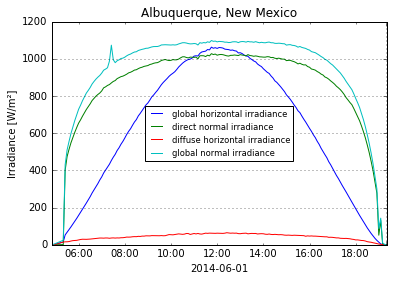

In [11]:
# now it's familiar territory for pandas users

nice_day = '2014-06-01'
irradiance = ['ghi','dni','dhi','gni']

weather.loc[nice_day, irradiance].plot()
plt.xlabel(nice_day)

# pick up info from the cdef and meta for the plot
plt.ylabel('Irradiance [%s]' % weather_columns.units.ghi);
plt.legend([weather_columns.long_name[c] for c in irradiance], 
           loc='best', fontsize='small')
plt.title('%s, %s' % (weather_meta['city'],
                      weather_meta['state']));

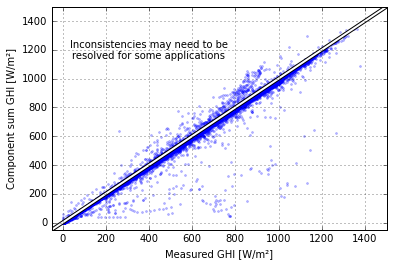

In [12]:
# check the consistency of the irradiance meassurements

weather['ghi_sum'] = weather.eval('dni * cos(zenith/57.29578) + dhi')

plt.figure()
plt.plot('ghi', 'ghi_sum', '.b', data=weather, alpha=0.3, ms=4)
plt.plot([-50,1500],[-50,1500],'k-', lw=4)
plt.plot([-50,1500],[-50,1500],'w-', lw=2)
plt.xlim(-50, 1500)
plt.ylim(-50, 1500)
plt.xlabel('Measured GHI [W/m²]')
plt.ylabel('Component sum GHI [W/m²]')

plt.text(400, 1200, 'Inconsistencies may need to be' '\n'
                    'resolved for some applications', 
         ha='center', va='center');

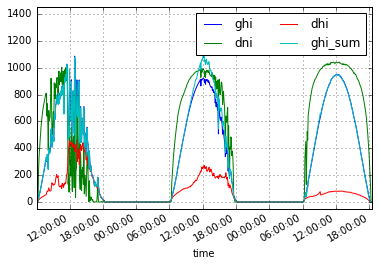

In [13]:
# inconsistencies are not too hard to spot because separate
# trackers are used for beam and diffuse measurements

before = '2014-03-22'
after = '2014-03-24'
irradiance = ['ghi','dni','dhi', 'ghi_sum']

weather.loc[before:after, irradiance].plot()
plt.ylim(-50, 1450)
plt.legend(loc='upper right', ncol=2);


In [14]:
# now read in the spectra and convert to a pandas DataFrame

with xr.open_dataset(SPECTRA_FILE) as spectra_ds:
    spectra_ds.load()

spectra = spectra_ds.gni.to_pandas()

print(spectra.index)


DatetimeIndex(['2014-01-01 07:10:00', '2014-01-01 07:15:00',
               '2014-01-01 07:20:00', '2014-01-01 07:25:00',
               '2014-01-01 07:30:00', '2014-01-01 07:35:00',
               '2014-01-01 07:40:00', '2014-01-01 07:45:00',
               '2014-01-01 07:50:00', '2014-01-01 07:55:00',
               ...
               '2014-12-31 16:25:00', '2014-12-31 16:30:00',
               '2014-12-31 16:35:00', '2014-12-31 16:40:00',
               '2014-12-31 16:45:00', '2014-12-31 16:50:00',
               '2014-12-31 16:55:00', '2014-12-31 17:00:00',
               '2014-12-31 17:05:00', '2014-12-31 17:10:00'],
              dtype='datetime64[ns]', name='time', length=54221, freq=None)


In [15]:
print(spectra.columns)


Float64Index([ 350.0,  355.0,  360.0,  365.0,  370.0,  375.0,  380.0,  385.0,
               390.0,  395.0,
              ...
              1655.0, 1660.0, 1665.0, 1670.0, 1675.0, 1680.0, 1685.0, 1690.0,
              1695.0, 1700.0],
             dtype='float64', name='wavelength', length=271)


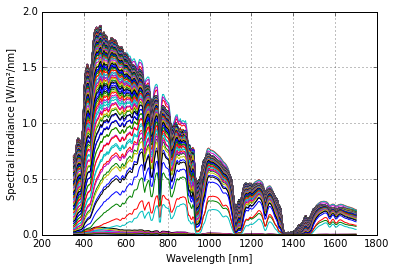

In [16]:
# plot some spectra

plt.figure()
plt.plot(spectra.loc[nice_day].T)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Spectral irradiance [W/m²/nm]');


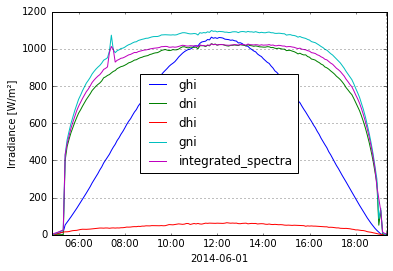

In [17]:
# integrate the spectra and compare to broadband values

wavelengths = spectra.columns.values
weather['integrated_spectra'] = np.trapz(spectra, x=wavelengths, axis=1)

irradiance = ['ghi','dni','dhi','gni', 'integrated_spectra']

weather.loc[nice_day, irradiance].plot()
plt.xlabel(nice_day)
plt.ylabel('Irradiance [W/m²]')
plt.legend(loc='best');


In [18]:
# now compare the whole year in a scatter plot
# here it is useful to use the 'dni_range' values
# to check whether the conditions were stable

# what is that? you ask...

print(weather_columns.comment.dni_range)


difference between minimum and maximum dni in a centered 15-second interval


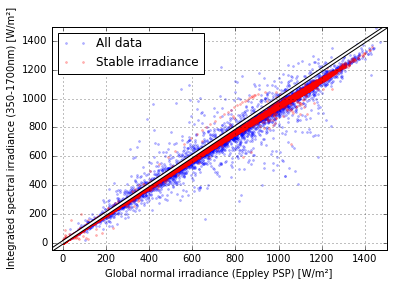

In [19]:
# ok, that could be useful

stable = weather.dni_range < 10

plt.figure()
plt.plot('gni', 'integrated_spectra', '.b', data=weather[~stable], alpha=.3, ms=4)
plt.plot('gni', 'integrated_spectra', '.r', data=weather[stable], alpha=.3, ms=4)
plt.plot([-50,1500],[-50,1500],'k-', lw=4)
plt.plot([-50,1500],[-50,1500],'w-', lw=2)
plt.xlim(-50, 1500)
plt.ylim(-50, 1500)
plt.xlabel('Global normal irradiance (Eppley PSP) [W/m²]')
plt.ylabel('Integrated spectral irradiance (350-1700nm) [W/m²]')
plt.legend(['All data', 'Stable irradiance'], loc='best');


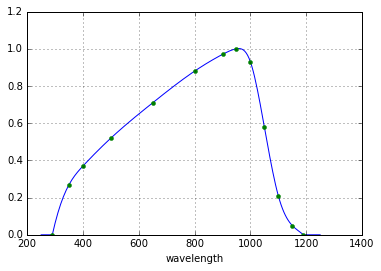

In [20]:
# the last objective is to calculate spectral mismatch
# here is some generic spectral response data for crystalline silicon

SR_DATA = np.array([[ 290,    0.00],
                    [ 350,    0.27],
                    [ 400,    0.37],
                    [ 500,    0.52],
                    [ 650,    0.71],
                    [ 800,    0.88],
                    [ 900,    0.97],
                    [ 950,    1.00],
                    [1000,    0.93],
                    [1050,    0.58],
                    [1100,    0.21],
                    [1150,    0.05],
                    [1190,    0.00]]).transpose()

sr = pd.Series(index=SR_DATA[0], data=SR_DATA[1])
sr.name = 'spectral_response'
sr.index.name = 'wavelength'

# use cubic interpolation to obtain values at 5nm intervals
# note: the above points were carefully chosen to achieve
# a smooth interpolated result and avoid undulations

sr = sr.reindex(np.linspace(250.0, 1250.0, 201))
sr.interpolate('cubic', inplace=True, limit_direction='both', fill_value=0.0)

plt.figure()
sr.plot()
plt.plot(SR_DATA[0], SR_DATA[1], '.', ms=8);


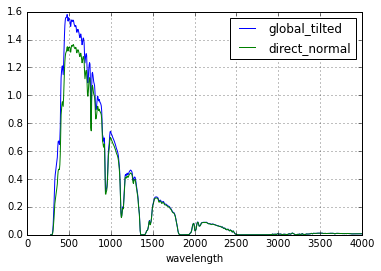

In [21]:
# and of course we need a reference spectrum, which is also provided
# note that it has constant wavelength intertervals of 5 nm
# in order to be consistent with the measured spectra

with xr.open_dataset(AM15_FILE) as ref_spectra_ds:
    ref_spectra_ds.load()

ref_spectra = ref_spectra_ds.to_pandas()

am15g = ref_spectra['global_tilted']

ref_spectra.plot();


In [22]:
#


### Some notes about spectral mismatch {-}

Spectral mismatch is really the ratio of two ratios:
```
          usable fraction of measured spectra
   smm = -------------------------------------
         usable fraction of reference spectrum
```
Typically smm is presented as the product of two ratios which obfuscates the meaning.

Two problems that frequently arise are:

  1. Wavelength intervals of spectra or spectral response do not match
     - this usually means you have to interpolate to matching wavelengths
     - to make things easier this data set is standardized on 5 nm intervals

  2. Wavelength ranges of spectra do not match
     - this means you have to truncate one or extend the other by modeling
     - both options will introduce some errors
     - proceeding with unequal ranges would usually produce bigger errors


In [23]:
# here are two helper functions for integration of spectral irradiance

# single spectra or sr will be pandas.Series, with wavelength as the index
# time series of spectra will be pandas.DataFrames, with time as the index
#   and wavelengths as column labels

def integrate_one(s):
    return np.trapz(s.fillna(0.0).values, s.index, axis=0)

def integrate_many(df):
    return np.trapz(df.fillna(0.0).values, df.columns, axis=1)

print('The integral of the global tilted reference spectrum is %.2f W/m².'
      % integrate_one(am15g))

The integral of the global tilted reference spectrum is 1000.37 W/m².


In [24]:
# truncate the reference spectrum to match the measured spectra
am15g_t = am15g.reindex(spectra.columns)

# now calculate the usable fractions...
uf_measured  = integrate_many(spectra * sr) / integrate_many(spectra)
uf_reference = integrate_one (am15g_t * sr) / integrate_one (am15g_t)

# ...and their quotient, which is the spectral mismatch
weather['smm'] = uf_measured / uf_reference


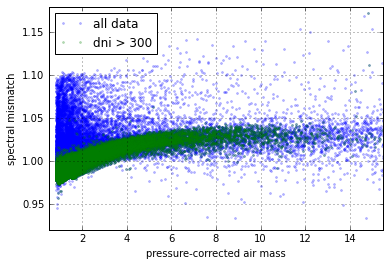

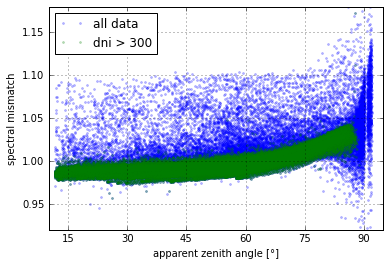

In [25]:
# plot mismatch against air mass and zenith angle

from pvlib.atmosphere import get_relative_airmass, get_absolute_airmass

weather['am_abs'] = get_absolute_airmass(get_relative_airmass(weather.apparent_zenith),
                                         weather.pressure)

# identify some clear times
clear = 'dni > 300'

plt.figure()
plt.plot('am_abs', 'smm', '.', data=weather, alpha=.3, ms=4, label='all data')
plt.plot('am_abs', 'smm', '.', data=weather.query(clear), alpha=.3, ms=4, label=clear)
plt.xlim(0.5, 15.5)
plt.ylim(0.92, 1.18)
plt.xlabel('pressure-corrected air mass')
plt.ylabel('spectral mismatch')
plt.legend(loc='best')

plt.figure()
plt.plot('apparent_zenith', 'smm', '.', data=weather, alpha=.3, ms=4, label='all data')
plt.plot('apparent_zenith', 'smm', '.', data=weather.query(clear), alpha=.3, ms=4, label=clear)
plt.xticks([15, 30, 45, 60, 75, 90])
plt.xlim(10, 95)
plt.ylim(0.92, 1.18)
plt.xlabel('apparent zenith angle [°]')
plt.ylabel('spectral mismatch')
plt.legend(loc='best');


### The end {-}